#AULA

Em muitos conjuntos de dados, o momento em que cada dado foi observado, seja o minuto, hora, dia, mês ou ano, é uma informação relevante. Quando isso ocorre, existe uma ordem inata nos dados, do mais antigo para o mais recente. Essa estrutura sequencial deve ser levada em conta durante a análise desses dados, pois muitos padrões surgem a partir dessa análise, como ciclos, tendências e exceções. Dados que são coletados sequencialmente ao longo do tempo são denominados séries temporais.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
uri = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/room_data.txt'
room = pd.read_csv(uri)
room.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio
0,2015-02-04 18:49:59,22.290,27.3900,0.0,621.00,0.004559
1,2015-02-04 19:50:00,21.890,27.1000,0.0,548.50,0.004401
2,2015-02-04 20:50:00,21.600,26.4725,0.0,509.75,0.004222
3,2015-02-04 21:49:59,21.445,25.7450,0.0,488.00,0.004067
4,2015-02-04 22:50:00,21.290,25.7000,0.0,467.00,0.004021


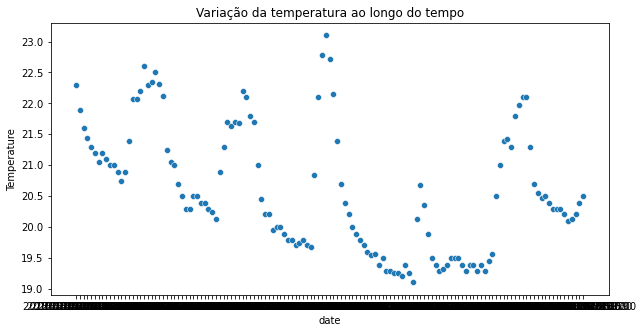

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.scatterplot(x="date", y="Temperature", data=room)
plt.show()

Perceba também que as informações do eixo horizontal ficarão tão cheias que não é possível ler nada. Isso ocorre porque, ao ler os dados do arquivo, o pandas interpreta a data como um texto, uma variável categórica. Como, nesse caso, o tempo é contínuo, é necessário converter o valor para um tipo que o pandas reconheça como tempo, chamado datetime. Isso pode ser feito com a função do pandas to_datetime().
Uma melhor abordagem para visualizar sequências é conectar cada ponto com uma linha, criando a percepção de continuidade. Esse gráfico é chamado de gráfico de linha, e pode ser criado com o seaborn através da função lineplot().

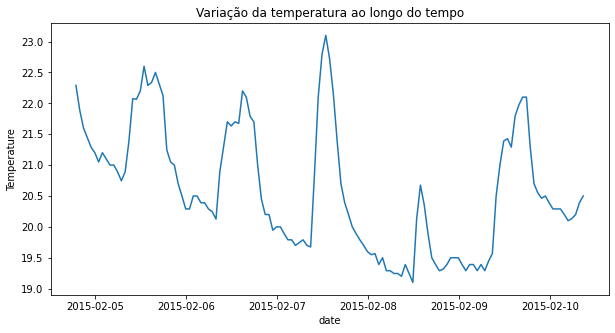

In [ ]:
room['date'] = pd.to_datetime(room['date'])
plt.figure(figsize=(10,5))
plt.title('Variação da temperatura ao longo do tempo')
sns.lineplot(x="date", y="Temperature", data=room)
plt.show()

Em muitos conjuntos de dados, podem existir múltiplas observações feitas durante o mesmo momento. Nesses casos, o comportamento padrão do seaborn é agregar os múltiplos valores em uma única linha que representa a média e exibir uma área sombreada que representa o intervalo de confiança para aquele valor. Vamos verificar como isso ocorre utilizando um outro conjunto de dados como exemplo.

In [ ]:
hiv_uri = 'https://raw.githubusercontent.com/cabrau/curso-analise-visualizacao-dados-python/master/hiv_data.txt'
hiv = pd.read_csv(hiv_uri)
hiv.head()

,country,date,HIV Rate,Income Level
0,Australia,2017,0.1,HIC
1,Australia,2016,0.1,HIC
2,Australia,2015,0.1,HIC
3,Australia,2014,0.1,HIC
4,Australia,2013,0.1,HIC


Perceba que, ao criar um gráfico com a taxa de HIV global, são consideradas, para cada ano, as medições em vários países. Como representar essas várias medições em uma mesma linha? Confira a seguir. Digamos que queremos visualizar como a taxa de HIV variou no mundo todo ao redor dos anos. Basta utilizar a função lineplot() igual como já feito anteriormente, passando a coluna ‘date’ para o eixo x e a coluna ‘HIV Rate’ para o eixo y.

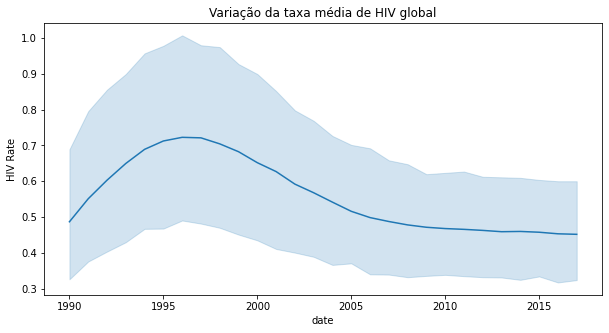

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV global')
sns.lineplot(x="date", y="HIV Rate", data=hiv)
plt.show()

Como já foi comentado, existem diversas taxas de HIV em cada ano, correspondente à taxa de cada país. Quando há múltiplas medições em um mesmo tempo, a função lineplot() exibe por padrão uma linha formada pela média de todos os valores em cada tempo. Como os dados podem variar em torno da média, é exibido também um intervalo de confiança na forma de uma área sombreada, indicando a região provável em que se encontram os dados. Grandes áreas sombreadas indicam que os dados variam muito. Se desejar mostrar apenas a linha da média sem o intervalo de confiança, pode-se alterar o parâmetro ci (confidence interval), passando o valor None.

Digamos que além da taxa média global, estamos interessados nas taxas médias por nível de renda dos países, como podemos fazer? A função lineplot() possui a mesma flexibilidade da função scatterplot(), podendo representar variáveis categóricas pela cor, tamanho ou forma, através dos parâmetros hue, size e style, respectivamente. Por exemplo, para visualizar as taxas por níveis de renda, basta passar a coluna ‘Income Level’ para o parâmetro hue, para que a função desenhe uma curva de cor diferente referente a cada nível.

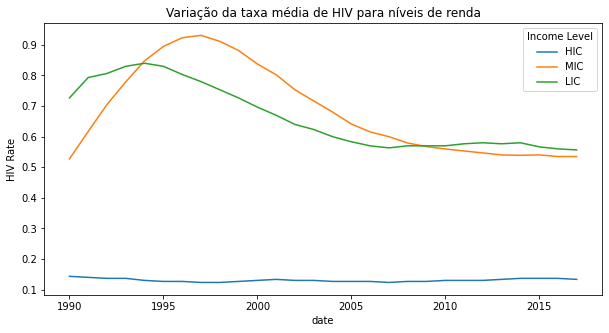

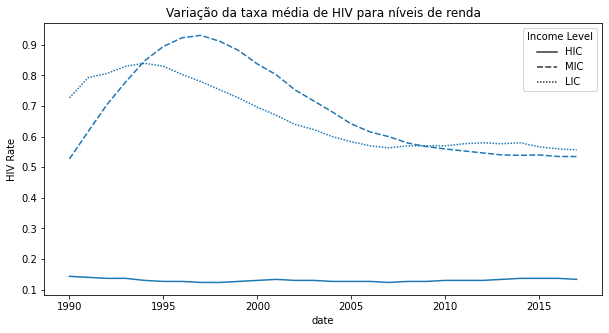

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x="date", y="HIV Rate", hue = 'Income Level', ci = None, data=hiv)
plt.show()

plt.figure(figsize=(10,5))
plt.title('Variação da taxa média de HIV para níveis de renda')
sns.lineplot(x="date", y="HIV Rate", style = 'Income Level', ci = None, data=hiv)
plt.show()

#OFICINA

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
uri = 'https://d11s0xq1vqg039.cloudfront.net/videos_conteudo/visual/micro07/oficina/arquivos/dadosoficina07.txt'
vendas = pd.read_csv(uri)

vendas.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


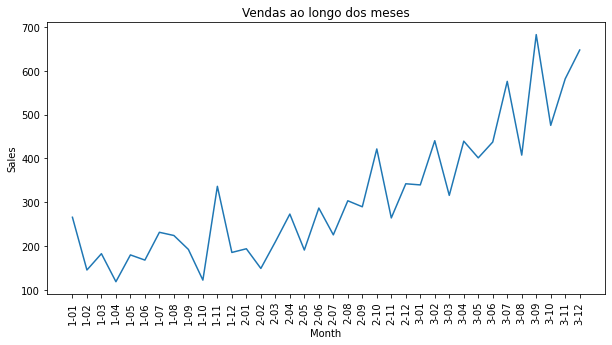

In [ ]:
plt.figure(figsize=(10,5))
plt.title('Vendas ao longo dos meses')
sns.lineplot(x="Month", y="Sales", data=vendas)
plt.xticks(fontsize=10,rotation=90)
plt.show()